In [3]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline


import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

numpy version  -  1.20.1
pandas version -  1.2.4


In [10]:
dataset = pd.read_excel('./data/mpg_visualization.xlsx' , header = 0 )
dataset.drop('Unnamed: 0' , axis = 1 , inplace = True)
dataset

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


<AxesSubplot:>

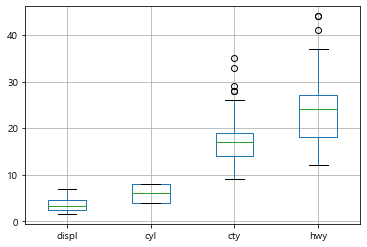

In [13]:
# 양적 자료의 데이터 분포 확인(boxplot)
dataset[['displ' , 'cyl' , 'cty', 'hwy']].boxplot()


In [14]:
# 질적 자료에 대한 데이터 빈도 확인(value_counts())
# 제조회사, 모델명, 변속기 종류, 구동방식, 연료종류, 자동차 종류  

dataset['manufacturer'].value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
subaru        14
hyundai       14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [9]:
# 문제01]
# 자동차 배기량(displ)에 따라 고속도로 연비(hwy)가 다른지를 알아보자
# 배기량이 4 이하인 자동차화 5이상인 자동차 중 어떤 자동차의 고속도로연비가 평균적으로 
# 높은지 알아보자
# dataframe - query()

print('hwy 4 under displ mean - ' , dataset[ dataset['displ'] <= 4 ]['hwy'].mean())
print('hwy 5 over  displ mean - ' , dataset[ dataset['displ'] >= 5 ]['hwy'].mean())
print()
print('hwy 4 under displ mean - ' , dataset.query('displ <= 4')['hwy'].mean() )
print('hwy 5 over  displ mean - ' , dataset.query('displ >= 5')['hwy'].mean() )


hwy 4 under displ mean -  25.96319018404908
hwy 5 over  displ mean -  18.07894736842105

hwy 4 under displ mean -  25.96319018404908
hwy 5 over  displ mean -  18.07894736842105


In [11]:
# 문제 02]
# 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고 한다. 
# audi와 toyota 중 어느 manufacturer(자동차 제조 회사)의 cty(도시연비)가 평균적으로 더 높은지 알아보시오.

print('audi   - ' , dataset[ dataset['manufacturer'] == 'audi' ]['cty'].mean())
print('toyota - ' , dataset[ dataset['manufacturer'] == 'toyota' ]['cty'].mean())

audi   -  17.61111111111111
toyota -  18.529411764705884


In [14]:
# 문제 03]
# chevrolet, ford, honda 자동차의 고속도로 연비 평균을 알아보려고 한다. 
# 이 회사들의 데이터를 추출한 후 hwy 전체 평균을 확인하시오.

print('chevrolet, ford, honda - ' , dataset[ (dataset['manufacturer'] == 'chevrolet') |
                                             (dataset['manufacturer'] == 'ford') |
                                             (dataset['manufacturer'] == 'honda') ]['hwy'].mean())
print()
manufacturer_list = ['chevrolet', 'ford', 'honda']
print('query - ' , dataset.query('manufacturer in @manufacturer_list')['hwy'].mean() )

chevrolet, ford, honda -  22.50943396226415

query -  22.50943396226415


In [17]:
print('연료가격 변수 추가(price_fl) - ')
print('c : 가스 2.35 , d : 디젤 2.38 , e : 에탄올 2.11 , p : 고급휘발유 2.76, r : 보통휘발유 2.22')

temp_frm = pd.DataFrame({
    'fl' : ['c', 'd', 'e', 'p', 'r'] , 
    'price_fl' : [2.35, 2.38, 2.11, 2.76, 2.22]
})
temp_frm

연료가격 변수 추가(price_fl) - 
c : 가스 2.35 , d : 디젤 2.38 , e : 에탄올 2.11 , p : 고급휘발유 2.76, r : 보통휘발유 2.22


,fl,price_fl
0,c,2.35
1,d,2.38
2,e,2.11
3,p,2.76
4,r,2.22


In [18]:
merge_dataset = pd.merge(dataset , temp_frm , on='fl' , how = 'inner')
merge_dataset

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...
229,jeep,grand cherokee 4wd,3.0,2008,6,auto(l5),4,17,22,d,suv,2.38
230,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,2.38
231,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,2.38
232,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,2.38


In [22]:
print('병합한 프레임에서 model , fl, price_fl 추출한다면? - ')
merge_dataset.filter(['model' , 'fl' , 'price_fl'])
# merge_dataset[['model' , 'fl' , 'price_fl']]

병합한 프레임에서 model , fl, price_fl 추출한다면? - 


,model,fl,price_fl
0,a4,p,2.76
1,a4,p,2.76
2,a4,p,2.76
3,a4,p,2.76
4,a4,p,2.76
...,...,...,...
229,grand cherokee 4wd,d,2.38
230,jetta,d,2.38
231,new beetle,d,2.38
232,new beetle,d,2.38


In [23]:
# 데이터 전처리 과정에서 결측값 확인하기

merge_dataset.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
price_fl        0
dtype: int64

In [27]:
# 구동방식(drv) 별 고속도로 연비(hwy)평균
# 임의적으로 결측값 처리를 위해서 더미 값을 넣어보도록 하자
merge_dataset.loc[0 , 'hwy']   = np.NaN
merge_dataset.loc[65 , 'hwy']  = np.NaN
merge_dataset.loc[120 , 'hwy'] = np.NaN
merge_dataset.loc[154 , 'hwy'] = np.NaN
merge_dataset.loc[189 , 'hwy'] = np.NaN
merge_dataset.loc[219 , 'hwy'] = np.NaN
merge_dataset.loc[230 , 'hwy'] = np.NaN


In [31]:
# 데이터 전처리 과정에서 결측값 확인하기
print( merge_dataset.isna().sum() )
print()
print('drv  hwy isna - ' , merge_dataset.filter(['drv' , 'hwy']).isna().sum() ) 
print()
print('drv  value - '    , merge_dataset.filter(['drv']).value_counts() ) 


manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             7
fl              0
class           0
price_fl        0
dtype: int64

drv  hwy isna -  drv    0
hwy    7
dtype: int64

drv  value -  drv
f      106
4      103
r       25
dtype: int64


In [45]:
# hwy변수의 결측값을 제외하고, 어떤 구동방식의 고속도로평균 연비가 높은지 알아보자
print('결측값 제외 - dropna()')

dropna_merge_dataset = merge_dataset.filter(['drv' , 'hwy']).dropna()
display( dropna_merge_dataset )

print()
print()
print('어떤 구동방식의 고속도로평균 연비가 높은지 알아보자 - groupby()')
dropna_merge_dataset.groupby('drv').mean()

결측값 제외 - dropna()


,drv,hwy
1,f,29.0
2,f,31.0
3,f,30.0
4,f,26.0
5,f,26.0
...,...,...
228,4,17.0
229,4,22.0
231,f,44.0
232,f,41.0




어떤 구동방식의 고속도로평균 연비가 높은지 알아보자 - groupby()


,hwy
drv,
4,19.174757
f,27.949495
r,21.000000


In [70]:
drv_dropna_merge_dataset = dropna_merge_dataset.groupby('drv').mean()
print('index - ' , drv_dropna_merge_dataset.index)
print('values - ' , drv_dropna_merge_dataset.values)
print('info - ' ,  drv_dropna_merge_dataset['hwy'].values.astype(int))

index -  Index([4, 'f', 'r'], dtype='object', name='drv')
values -  [[19.17475728]
 [27.94949495]
 [21.        ]]
info -  [19 27 21]


구동방식별 연비평균을 비교하기 위한 막대 그래프로 시각화 해 보자  - 




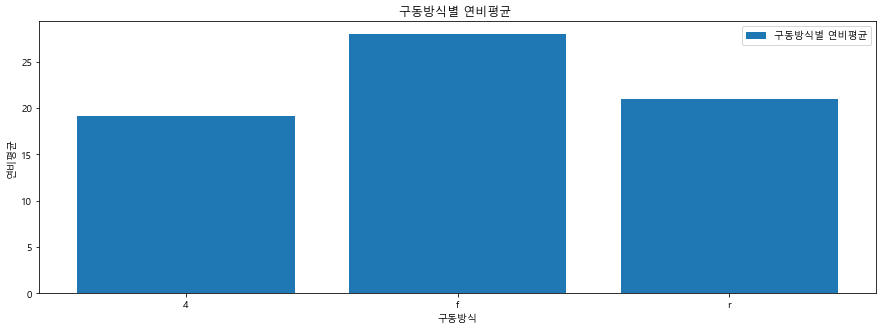

In [98]:
# 구동방식별 연비평균을 비교하기 위한 막대 그래프로 시각화 해 보자

print('구동방식별 연비평균을 비교하기 위한 막대 그래프로 시각화 해 보자  - ') 
print()
print()

X =  drv_dropna_merge_dataset.index.values
Y =  drv_dropna_merge_dataset.values.reshape(-1, )

plt.figure(figsize = (15, 5))

plt.bar( np.arange(len(X)) , Y)

# drv_dropna_merge_dataset.plot(kind='bar')

plt.title('구동방식별 연비평균 ')
plt.xlabel('구동방식')
plt.ylabel('연비평균')
plt.xticks(np.arange(len(X)), X)

plt.legend(labels = ['구동방식별 연비평균'] , loc = 'best')


plt.show()
plt.close()

In [85]:
# 위에서 했던 방식과 동일하게 구동방식별 고속도로, 도시연비의 평균을 구해보고
# 이를 데이터 프레임으로 만들어서 막대바로 시각화 해 보자
# hwy변수의 결측값을 제외하고, 어떤 구동방식의 고속도로평균 연비가 높은지 알아보자

dropna_merge_dataset = merge_dataset.filter(['drv' , 'hwy' , 'cty']).dropna()
# dropna_merge_dataset

drv_hwy_cty_group = dropna_merge_dataset.groupby('drv').mean()
drv_hwy_cty_group

,hwy,cty
drv,,
4,19.174757,14.330097
f,27.949495,19.808081
r,21.000000,14.080000


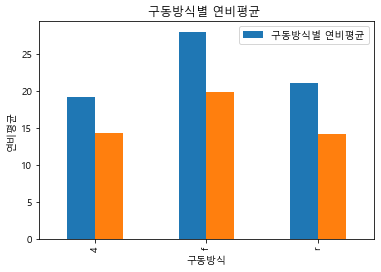

In [86]:
drv_hwy_cty_group.plot(kind='bar')

plt.title('구동방식별 연비평균 ')
plt.xlabel('구동방식')
plt.ylabel('연비평균')

plt.legend(labels = ['구동방식별 연비평균'] , loc = 'best')


plt.show()
plt.close()

type -  <class 'pandas.core.series.Series'>
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64



Text(0, 0.5, '차량 수')

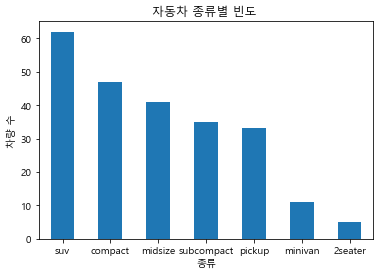

In [91]:
# 자동차(class)중에서 어떤 자동차가 가장 많은지 알아보려고 한다.
# 종류별 빈도를 막대바로 시각화 해 보자
print('type - ' , type(merge_dataset['class'].value_counts()))
print(merge_dataset['class'].value_counts())
print()

merge_dataset['class'].value_counts().plot(kind='bar' , rot=0)
plt.title('자동차 종류별 빈도 ')
plt.xlabel('종류')
plt.ylabel('차량 수')


In [104]:
# 어떤 회사에서 생산한 suv 차종의 도시 연비가 높은지를 알아보려고 한다
# suv 차종을 대상으로 평균 도시연비가 가장 높은 회사 다섯곳을 막대 바로 시각화 해 보자

suv_mean_frm = merge_dataset[ merge_dataset['class'] == 'suv'].filter(['manufacturer' , 'cty']).groupby('manufacturer').mean()
suv_mean_frm.sort_values('cty' , ascending=False , inplace=True)

Text(0, 0.5, '도시연비 평균')

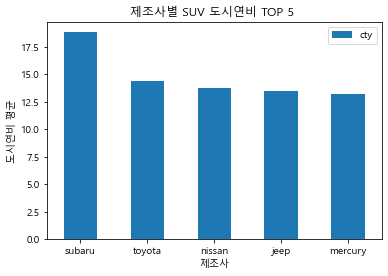

In [108]:
suv_mean_frm.head(5).plot(kind='bar' , rot=0)

plt.title('제조사별 SUV 도시연비 TOP 5 ')
plt.xlabel('제조사')
plt.ylabel('도시연비 평균')


<AxesSubplot:>

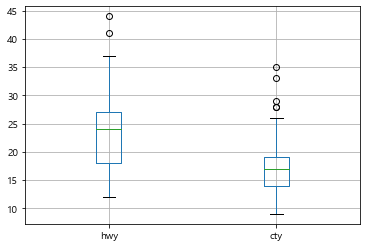

In [110]:
# 이상치 정제
# car_mpg 데이터에서 구동방식별 고속도로 연비 평균과 도시연비 평균을 극단치를 제외하고 확인
# 각 연비별 이상치 확인 boxplot()

outlier_frm = merge_dataset.filter(['hwy' , 'cty'])
outlier_frm.boxplot()

In [112]:
print('3사분위 정보를 얻어본다면? - quantile')
outlier_frm.quantile(q=0.75)

3사분위 정보를 얻어본다면? - quantile


hwy    27.0
cty    19.0
Name: 0.75, dtype: float64

In [113]:
print('1사분위 정보를 얻어본다면? - quantile')
outlier_frm.quantile(q=0.25)

1사분위 정보를 얻어본다면? - quantile


hwy    18.0
cty    14.0
Name: 0.25, dtype: float64

In [115]:
print('IQR (3사분위 수 - 1사분위 수의 차) - quantile')
iqr = outlier_frm.quantile(q=0.75) - outlier_frm.quantile(q=0.25)


IQR (3사분위 수 - 1사분위 수의 차) - quantile


In [118]:
lower = outlier_frm.quantile(q=0.25) - 1.5 * iqr
upper = outlier_frm.quantile(q=0.75) + 1.5 * iqr
print('lower fence - ' , lower)
print()
print('upper fence - ' , upper)

lower fence -  hwy    4.5
cty    6.5
dtype: float64

upper fence -  hwy    40.5
cty    26.5
dtype: float64


In [126]:
lower_outlier = outlier_frm[ outlier_frm > lower].min()
upper_outlier = outlier_frm[ outlier_frm < upper].max()
print('극단치 경계 값을 얻어 보자 (아래 수평선) - ' , lower_outlier)
print()
print('극단치 경계 값을 얻어 보자 (위 수평선) - ' , upper_outlier)

극단치 경계 값을 얻어 보자 (아래 수평선) -  12.0

극단치 경계 값을 얻어 보자 (위 수평선) -  hwy    37.0
cty    26.0
dtype: float64


In [130]:
print('이상치를 결측값으로 변경 - ')
print('고속도로 연비의 이상치 데이터 추출 - ')

hwy_outlier_frm = merge_dataset.query('hwy > '+str(upper_outlier['hwy']))
display(hwy_outlier_frm)
print()
print()

print('도시 연비의 이상치 데이터 추출 - ')
cty_outlier_frm = merge_dataset.query('cty > '+str(upper_outlier['cty']))
display(cty_outlier_frm)



이상치를 결측값으로 변경 - 
고속도로 연비의 이상치 데이터 추출 - 


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
231,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44.0,d,subcompact,2.38
232,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41.0,d,subcompact,2.38




도시 연비의 이상치 데이터 추출 - 


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
119,honda,civic,1.6,1999,4,manual(m5),f,28,33.0,r,subcompact,2.22
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37.0,r,compact,2.22
230,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,NaN,d,compact,2.38
231,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44.0,d,subcompact,2.38
232,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41.0,d,subcompact,2.38


In [133]:
clean_frm = merge_dataset.copy()

In [134]:
for idx in hwy_outlier_frm.index :
    # print(idx)
    clean_frm.loc[idx , 'hwy'] = np.NaN

In [135]:
for idx in cty_outlier_frm.index :
    # print(idx)
    clean_frm.loc[idx , 'cty'] = np.NaN

In [136]:
clean_frm.filter(['hwy' , 'cty']).isna().sum()

hwy    9
cty    5
dtype: int64

결측값 제거한 구동방식별 고속도로, 도시 연비 평균 - 


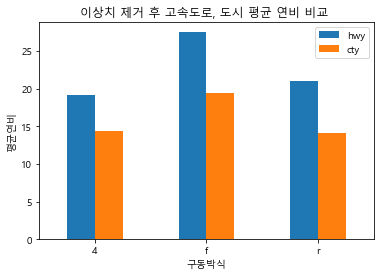

In [138]:
print('결측값 제거한 구동방식별 고속도로, 도시 연비 평균 - ')

clean_frm.filter(['drv' , 'hwy' , 'cty']).dropna().groupby('drv').mean().plot(kind='bar' , rot=0)

plt.title('이상치 제거 후 고속도로, 도시 평균 연비 비교 ')
plt.xlabel('구동박식')
plt.ylabel('평균연비')

plt.show()
plt.close()